In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

In [4]:
df = pd.read_csv("EDA_Model_automobile_V2.csv")

In [5]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,1,154,plymouth,std,four,sedan,fwd,front,93.7,0.803940,0.886111,50.8,2191,ohc,four,98,2bbl,2.970000,3.2300,9.40,68.000000,5500.000000,31,38,7609,7.580645,Low,0,1
1,0,122,peugot,turbo,four,wagon,rwd,front,114.2,0.955790,0.950000,58.7,3430,l,four,152,idi,3.700000,3.5200,21.00,95.000000,4150.000000,25,25,13860,9.400000,Low,1,0
2,0,102,subaru,turbo,four,sedan,4wd,front,97.0,0.826526,0.908333,54.3,2510,ohcf,four,108,mpfi,3.620000,2.6400,7.70,111.000000,4800.000000,24,29,11259,9.791667,Medium,0,1
3,0,145,jaguar,std,four,sedan,rwd,front,113.0,0.959154,0.966667,52.8,4066,dohc,six,258,mpfi,3.630000,4.1700,8.10,176.000000,4750.000000,15,19,32250,15.666667,High,0,1
4,-1,93,mercedes-benz,turbo,four,sedan,rwd,front,115.6,0.973570,0.995833,56.3,3770,ohc,five,183,idi,3.580000,3.6400,21.50,123.000000,4350.000000,22,25,31600,10.681818,Medium,1,0
5,2,94,volkswagen,std,four,sedan,fwd,front,97.3,0.825084,0.909722,55.7,2264,ohc,four,97,idi,3.010000,3.4000,23.00,52.000000,4800.000000,37,46,7995,6.351351,Low,1,0
6,0,122,mercedes-benz,std,four,sedan,rwd,front,120.9,1.000000,0.995833,56.7,3900,ohcv,eight,308,mpfi,3.800000,3.3500,8.00,184.000000,4500.000000,14,16,40960,16.785714,High,0,1
7,0,78,honda,std,four,wagon,fwd,front,96.5,0.754926,0.887500,58.3,2024,ohc,four,92,1bbl,2.920000,3.4100,9.20,76.000000,6000.000000,30,34,7295,7.833333,Low,0,1
8,0,161,peugot,std,four,sedan,rwd,front,107.9,0.897165,0.950000,56.7,3075,l,four,120,mpfi,3.460000,2.1900,8.40,95.000000,5000.000000,19,24,15580,12.368421,Low,0,1
9,0,102,subaru,std,four,sedan,fwd,front,97.2,0.826526,0.908333,52.5,2340,ohcf,four,108,mpfi,3.620000,2.6400,9.00,94.000000,5200.000000,26,32,9960,9.038462,Low,0,1


# Câu 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    int64  
 2   make               200 non-null    object 
 3   aspiration         200 non-null    object 
 4   num-of-doors       200 non-null    object 
 5   body-style         200 non-null    object 
 6   drive-wheels       200 non-null    object 
 7   engine-location    200 non-null    object 
 8   wheel-base         200 non-null    float64
 9   length             200 non-null    float64
 10  width              200 non-null    float64
 11  height             200 non-null    float64
 12  curb-weight        200 non-null    int64  
 13  engine-type        200 non-null    object 
 14  num-of-cylinders   200 non-null    object 
 15  engine-size        200 non-null    int64  
 16  fuel-system        200 non

In [7]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

# Câu 2

In [8]:
df_number = df[['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
                'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

In [9]:
len(df_number.columns)

16

In [10]:
def check_symmetry_of_series(series, percent=0.1):
  mean = series.mean()
  median = series.median()
  mode = series.mode()

  if len(mode)==1:
    if abs(median - mean) <= percent*median and abs(median - mode[0]) <= percent*median:
      return True
    else: return False
  else:
    return False
  
def check_symmetry_of_df(df_number):
  d = {}
  for col in df_number.columns:
    d[col] = check_symmetry_of_series(df_number[col])
  return d

In [11]:
result = check_symmetry_of_df(df_number)
result_symmetry = [x for x in result if result[x]==True]
result_not_symmetry = [x for x in result if result[x]==False]

In [12]:
result_symmetry

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke']

In [13]:
result_not_symmetry

['symboling',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

# Câu 3

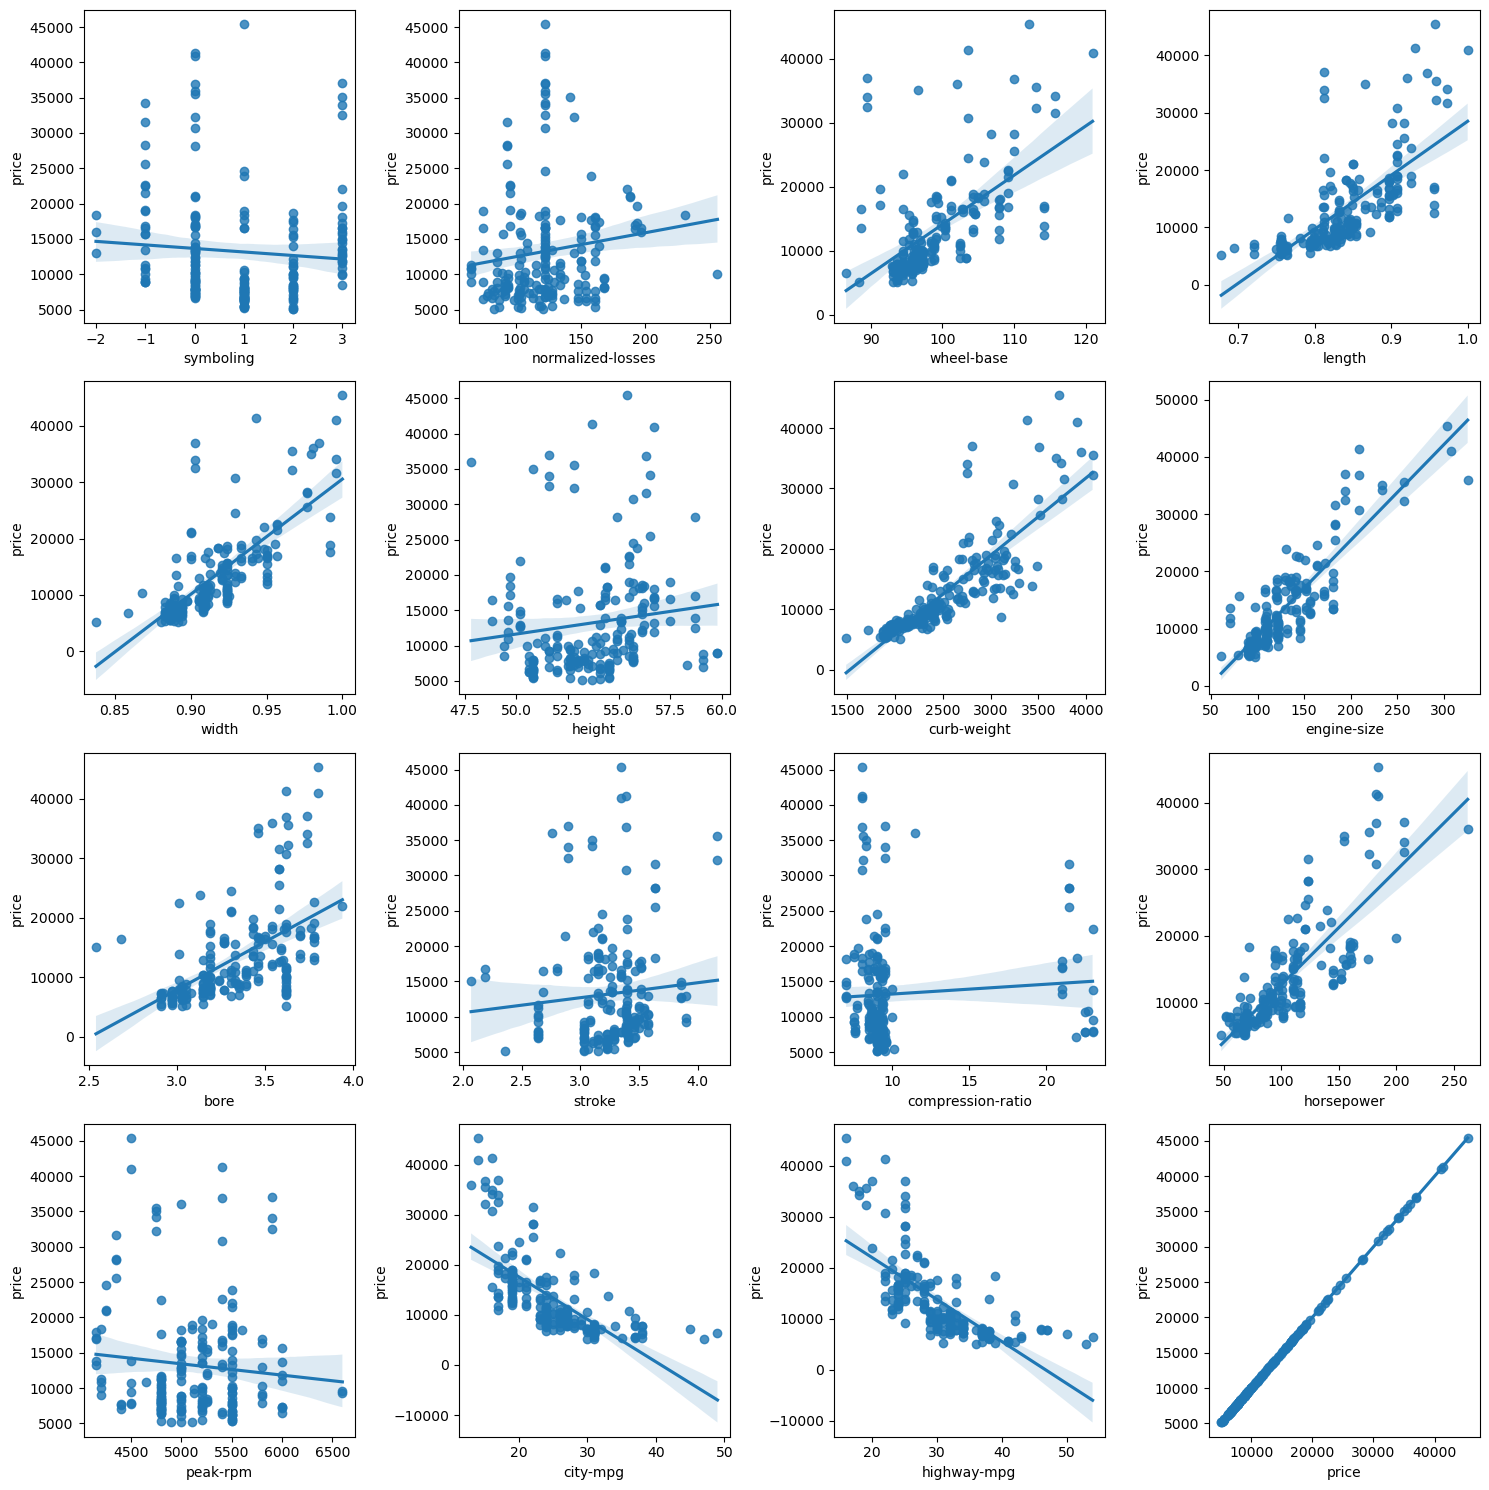

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
i, j = 0, 0

col = df_number.columns
for i in range(4):
    for j in range(4):
        sns.regplot(x=df_number[col[i*4+j]], y=df_number["price"], data=df_number, ax=axes[i][j])

plt.tight_layout()
plt.show()

In [15]:
def check_correclation(s1, s2):
  r, p = stats.pearsonr(s1, s2)
  if p < 0.05:
    if 0.8<abs(r)<1:
      return 1
    if 0.5<abs(r)<0.8:
      return 2
    if 0.3<abs(r)<0.5:
      return 3
  else:
    return False
  
def find_correlate_variable(df_number):
  dict_correlate = {}
  for col in df_number.columns:
    result = check_correclation(df_number[col], df_number["price"])
    if result:
      dict_correlate[col] = check_correclation(df_number[col], df_number["price"])
  return dict_correlate

In [16]:
dict_correlate = find_correlate_variable(df_number)
dict_correlate

{'wheel-base': 2,
 'length': 2,
 'width': 2,
 'curb-weight': 1,
 'engine-size': 1,
 'bore': 2,
 'horsepower': 1,
 'city-mpg': 2,
 'highway-mpg': 2}

# Câu 4

In [17]:
col_correlate_1 = [col for col in dict_correlate if dict_correlate[col] == 1]
col_correlate_1

['curb-weight', 'engine-size', 'horsepower']

In [18]:
col_correlate_2 = [col for col in dict_correlate if dict_correlate[col] == 2]
col_correlate_2

['wheel-base', 'length', 'width', 'bore', 'city-mpg', 'highway-mpg']

In [19]:
for col in col_correlate_1:
  print(col, stats.pearsonr(df_number[col], df_number['price'])[0])

curb-weight 0.834290009465507
engine-size 0.8719068307580168
horsepower 0.8090208109055184


In [20]:
for col in col_correlate_2:
  print(col, stats.pearsonr(df_number[col], df_number['price'])[0])

wheel-base 0.5834503691357351
length 0.6921854275742377
width 0.7503572990942347
bore 0.5410744665868135
city-mpg -0.6854458321436423
highway-mpg -0.7035476153448258


Biến số có nhiều ảnh hưởng đến giá xe nhất là: "engine-size"

Biến số có ít ảnh hưởng đến giá xe nhất là: "bore"

# Câu 5

In [27]:
def cal_anova_of_variable(lst_col):

  df_groups = df[lst_col].groupby(lst_col[:-1])

  names_groups = df[lst_col[:-1]].drop_duplicates().values

  if len(lst_col) > 2:
    group_values = [df_groups.get_group(tuple(name))['price'] for name in names_groups]
  else:
    group_values = [df_groups.get_group(name[0])['price'] for name in names_groups]

  f_statistic, p_value = stats.f_oneway(*group_values)
  if p_value < 0.05:
    lst = [[list(names_groups[i]), 0] for i in range(len(names_groups))]
    for i in range(len(group_values)-1):
      for j in range(len(group_values)):
        f, p = stats.f_oneway(group_values[i], group_values[j])
        if p < 0.05:
          lst[i][1] += f
          lst[j][1] += f
    return lst
  else:
      return False

<AxesSubplot:xlabel='body-style', ylabel='price'>

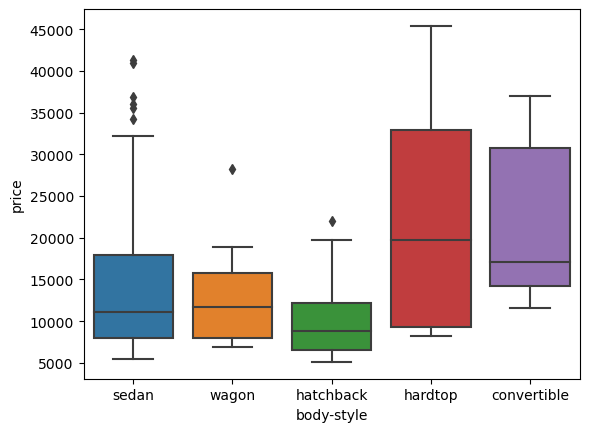

In [28]:
sns.boxplot(x="body-style", y="price", data=df)

In [29]:
lst = cal_anova_of_variable(['body-style', 'price'])
lst[np.argmin([lst[i][1] for i in range(len(lst))])][0]

['wagon']

# Câu 6

In [30]:
lst = cal_anova_of_variable(['make', 'body-style', 'aspiration', 'price'])
lst[np.argmax([lst[i][1] for i in range(len(lst))])][0]

c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


['dodge', 'hatchback', 'std']

# Câu 7

In [31]:
category_col = ['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                  'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned']

In [32]:
from itertools import combinations

def find_k_category_variable(category_col, k, type='max'):
  results = []
  lst_group = list(combinations(category_col, k)) # tổ hợp k nhóm trong danh sách
  for group in lst_group:
    lst = cal_anova_of_variable(list(group+('price',)))
    if lst:
      results.append(lst[np.argmax([lst[i][1] for i in range(len(lst))])])

  if type == 'max': # ảnh hưởng nhiều nhất
    idx = np.argmax([results[i][1] for i in range(len(results))])
  elif type == 'min': # ảnh hưởng ít nhất
    idx = np.argmin([results[i][1] for i in range(len(results))])
  return lst_group[idx]

In [33]:
find_k_category_variable(category_col, 3, 'max')

c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater tha

('make', 'num-of-doors', 'fuel-system')

# Câu 8

In [34]:
find_k_category_variable(category_col, 4, 'min')

c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater tha

('aspiration', 'num-of-doors', 'body-style', 'engine-location')

# Câu 9

In [35]:
find_k_category_variable(category_col, 1, 'max')

c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))
c:\Users\Admin\anaconda3\envs\CS116\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


('make',)

# Câu 10

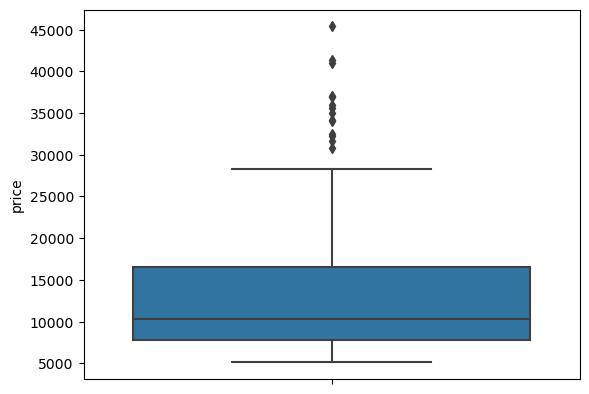

In [36]:
boxplot = sns.boxplot(y="price", data=df)

In [37]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Xác định giá trị ngoại lệ
lower_extreme = Q1 - 1.5 * IQR
upper_extreme = Q3 + 1.5 * IQR

print("lower_extreme = ", lower_extreme)
print("upper_extreme = ", upper_extreme)

outliers = df[(df['price'] < lower_extreme) | (df['price'] > upper_extreme)]

print(f"Số lượng giá trị ngoại lệ là {len(outliers)} chiếm {len(outliers)/len(df)}% điểm dữ liệu")

lower_extreme =  -5289.25
upper_extreme =  29574.75
Số lượng giá trị ngoại lệ là 14 chiếm 0.07% điểm dữ liệu
